In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pickle
import pprint

In [17]:
def CentralityMeasures(G):
    # Betweenness centrality
    bet_cen = nx.betweenness_centrality(G)
    # Closeness centrality
    clo_cen = nx.closeness_centrality(G)
    # Eigenvector centrality
    eig_cen = nx.eigenvector_centrality(G)
    # Degree centrality
    deg_cen = nx.degree_centrality(G)
    #print bet_cen, clo_cen, eig_cen
    #print("# Betweenness centrality:" + str(bet_cen))
    print("# Closeness centrality:" + str(clo_cen))
    #print( "# Eigenvector centrality:" + str(eig_cen))
    #print("# Degree centrality:" + str(deg_cen))
    output = open('data3.pkl', 'wb')
    # Pickle dictionary using protocol 0.
    pickle.dump(clo_cen, output,-1)
    output.close()  

In [18]:
def DegreeDistribution(G):
    degree = nx.degree_histogram(G)
    x = range(len(degree))
    y = [z / float(sum(degree)) for z in degree]
    plt.loglog(x,y,color = "blue", linewidth = 2)
    plt.show()


In [28]:
def Assortativity(G):
    r=nx.degree_assortativity_coefficient(G)
    print("Assortativity : ",r)
 

In [20]:
def directed_modularity_matrix(G, nodelist=None):
    """ INCLUDED FOR TESTING PURPOSES - Not implemented yet.

    Return the directed modularity matrix of G.
    The modularity matrix is the matrix B = A - <A>, where A is the adjacency
    matrix and <A> is the expected adjacency matrix, assuming that the graph
    is described by the configuration model.
    More specifically, the element B_ij of B is defined as
        B_ij = A_ij - k_i(out) k_j(in)/m
    where k_i(in) is the in degree of node i, and k_j(out) is the out degree
    of node j, with m the number of edges in the graph.
    Parameters
    ----------
    G : DiGraph
       A NetworkX DiGraph
    nodelist : list, optional
       The rows and columns are ordered according to the nodes in nodelist.
       If nodelist is None, then the ordering is produced by G.nodes().
    Returns
    -------
    B : Numpy matrix
      The modularity matrix of G.
    Notes
    -----
    NetworkX defines the element A_ij of the adjacency matrix as 1 if there
    is a link going from node i to node j. Leicht and Newman use the opposite
    definition. This explains the different expression for B_ij.
    See Also
    --------
    to_numpy_matrix
    adjacency_matrix
    laplacian_matrix
    modularity_matrix
    References
    ----------
    .. [1] E. A. Leicht, M. E. J. Newman,
       "Community structure in directed networks",
        Phys. Rev Lett., vol. 100, no. 11, p. 118703, 2008.
    """
    if nodelist is None:
        nodelist = G.nodes()
    A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, format='csr')
    k_in = A.sum(axis=0)
    k_out = A.sum(axis=1)
    m = G.number_of_edges()
    # Expected adjacency matrix
    X = k_out * k_in / m
    return A - X

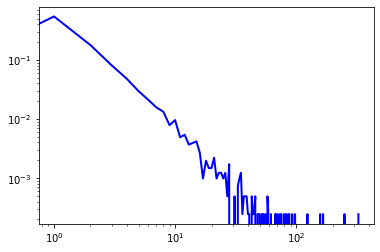

Assortativity :  -0.056335940234687965


In [29]:
import pandas as pd 
body = pd.read_csv("soc-redditHyperlinks-body.tsv", sep='\t')
body.head()
df = body.head(10000)
G = nx.from_pandas_edgelist(df, source="SOURCE_SUBREDDIT", target="TARGET_SUBREDDIT", create_using=nx.MultiDiGraph(), edge_attr=("TIMESTAMP", "LINK_SENTIMENT"))

DegreeDistribution(G)
Assortativity(G)

In [23]:
directed_modularity_matrix(G, nodelist=None)

matrix([[-9.61433260e-02,  9.97401532e-01,  0.00000000e+00, ...,
         -2.59846827e-03,  0.00000000e+00, -2.59846827e-03],
        [ 9.94939825e-01, -1.36761488e-04,  0.00000000e+00, ...,
         -1.36761488e-04,  0.00000000e+00, -1.36761488e-04],
        [-5.06017505e-03, -1.36761488e-04,  0.00000000e+00, ...,
         -1.36761488e-04,  0.00000000e+00, -1.36761488e-04],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.06017505e-03, -1.36761488e-04,  0.00000000e+00, ...,
         -1.36761488e-04,  0.00000000e+00, -1.36761488e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [27]:
from operator import itemgetter, attrgetter
pkl_file3 = open('data3.pkl', 'rb')
d = pickle.load(pkl_file3)
pkl_file3.close()
new_d = sorted(d.items(), key=itemgetter(1), reverse=True)
print(new_d)

[('askreddit', 0.18480888912693413), ('iama', 0.18126545733615337), ('pics', 0.17454908239670688), ('todayilearned', 0.16291272614925348), ('videos', 0.1607340270480968), ('gaming', 0.15708308385381772), ('wtf', 0.15620538566599745), ('adviceanimals', 0.15396527787662684), ('funny', 0.1534685637210112), ('technology', 0.15318218191517738), ('politics', 0.15168203895496332), ('worldnews', 0.1497167953274625), ('askscience', 0.14928070470792826), ('television', 0.14902939039023813), ('music', 0.14731589059150016), ('aww', 0.14464550750998637), ('movies', 0.1443032064033515), ('science', 0.14347288861095236), ('news', 0.14330508267988462), ('pcmasterrace', 0.1431576061172914), ('gifs', 0.14258179959100206), ('frugal', 0.1410017429495824), ('explainlikeimfive', 0.14053370425888528), ('hockey', 0.14025032936912227), ('baseball', 0.14023013202906337), ('whowouldwin', 0.13919491890003363), ('offmychest', 0.13908842119837395), ('lifeprotips', 0.13816090193101818), ('theredpill', 0.137887006061